## All group memebers contributed to the problem given equally
## Name and Roll No of group members
## Tanya D Vyas (23510124) 25%
## Tarun Kumar(23510125) 25%
## Tharasinh Katravath(23510126) 25%
## Tiyasha Khatua(23510128) 25%

In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
M, N = 201, 201

X, Y = np.meshgrid(range(M), range(N))

In [64]:
def set_boundary(V):
    # Define center and radius of the circle
    k, l = M // 2, N // 2
    r = 25
    thickness = 1  # Thickness of the shell
    
    # Calculate distance from the center for each point
    distance_from_center = np.sqrt((X - k)**2 + (Y - l)**2)
    
    # Create mask for points within a range of radii
    mask = np.logical_and(distance_from_center >= r - thickness,distance_from_center <= r + thickness)
                           
    
    # Set potential for points inside the circle shell
    V[mask] = 1.0
    
    return V

def relax(V, imax=30): 
    # find self−consistent soln 
    for i in range(imax):
        V[1:-1, 1:-1] = ( V[1:-1,:-2] + V[1:-1,2:] \
                         + V[:-2,1:-1] + V[2:,1:-1] )/4.
        V = set_boundary(V)       
    return V

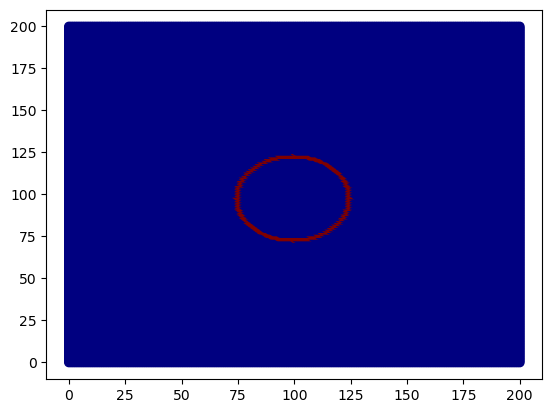

In [65]:
V = np.zeros((M,N))
V = set_boundary(V)
plt.figure()
plt.scatter(X,Y , c=V.transpose(), cmap='jet')

plt.show()

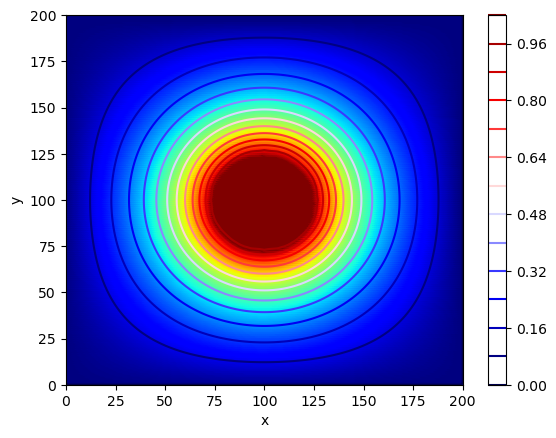

In [66]:
V = np.zeros((M,N))
V = set_boundary(V)
V = relax(V, 5001)

plt.figure()


plt.scatter(X, Y, c=V.transpose(), cmap=plt.cm.jet)
plt.contour(X, Y, V.transpose(), 14, cmap=plt.cm.seismic)

plt.colorbar()

plt.xlabel('x'), plt.ylabel ('y')
plt.show()

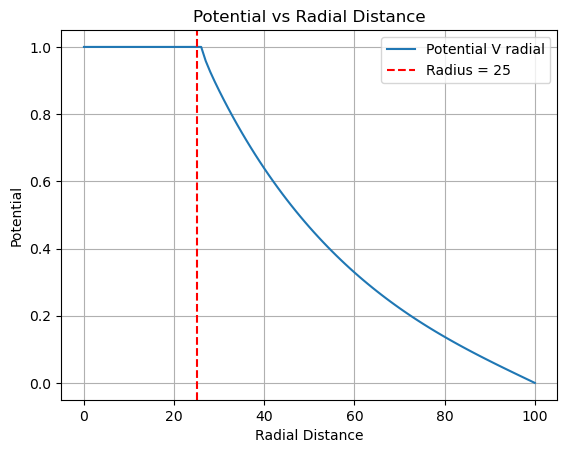

In [67]:
XX = X[0, 100:]
YY = Y[100, 0]

# Plotting V along the line
plt.figure()
plt.plot(XX - 100, V[XX, 100], label='Potential V radial')
plt.axvline(x=25, ls='--', color='red', label = 'Radius = 25')
plt.title("Potential vs Radial Distance")
plt.xlabel("Radial Distance")
plt.ylabel("Potential")
plt.grid(True)
plt.legend()
plt.show()

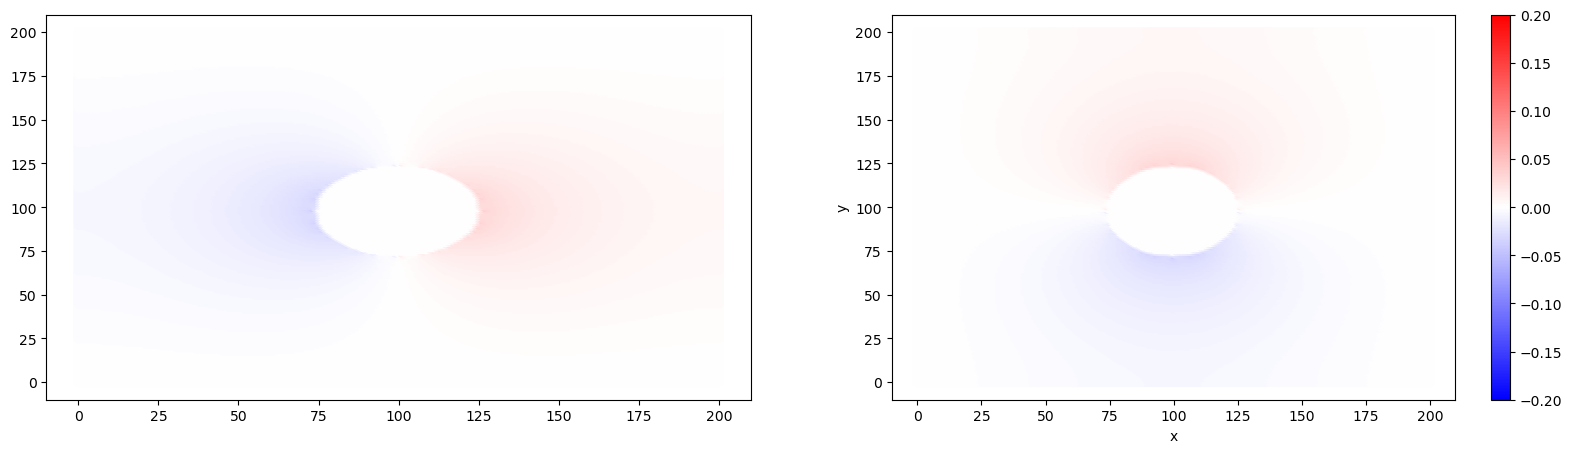

In [68]:
Ex, Ey = np.gradient(-V)
Emag = np.sqrt(Ex*Ex + Ey*Ey)


plt.figure(figsize=(20, 5))

#-- Ex field
ax = plt.subplot(121)
plt.scatter(X, Y, c=Ex.transpose(), vmin=-0.2, vmax=0.2, cmap=plt.cm.bwr)

#-- Ey field
ax = plt.subplot(122)
plt.scatter(X, Y, c=Ey.transpose(), vmin=-0.2, vmax=0.2, cmap=plt.cm.bwr)

plt.colorbar()

ax.set_xlabel('x'), ax.set_ylabel ('y')
plt.show()

## Problem 3.6 and 3.7

In [69]:
def set_boundary(V, k=1.0):
    # Define center and radius of the circle
    cx, cy = M // 2, N // 2
    r = 25
    thickness = 1  # Thickness of the shell
    
    # Calculate squared distance from the center for each point
    d_squared = (X - cx)**2 + (Y - cy)**2
    
    # Calculate polar coordinates
    theta = np.arctan2(Y - cy, X - cx)
    
    # Potential function
    V0 = k * np.sin(theta/2)**2
    
    # Create mask for points within a range of radii
    mask = np.logical_and(d_squared >= (r - thickness)**2, d_squared <= (r + thickness)**2)
                           
    
    # Set potential for points inside the circle shell
    V[mask] = V0[mask]
    
    return V

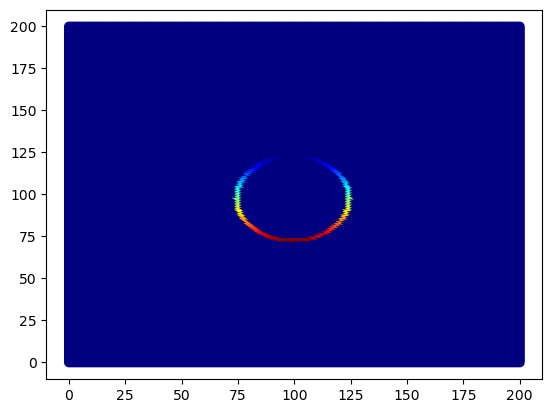

In [70]:
V = np.zeros((M,N))
V = set_boundary(V)
plt.figure()
plt.scatter(X,Y , c=V.transpose(), cmap='jet')

plt.show()

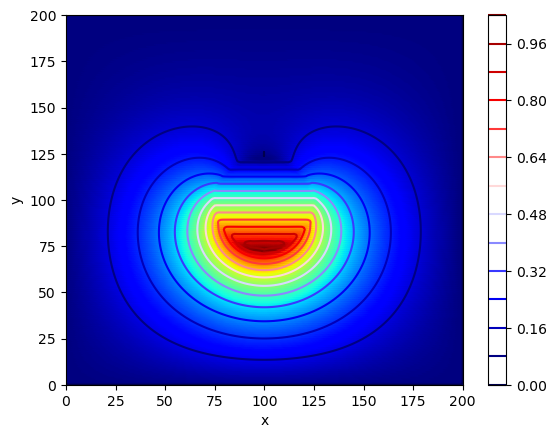

In [71]:
V = np.zeros((M,N))
V = set_boundary(V)
V = relax(V, 5001)

plt.figure()


plt.scatter(X, Y, c=V.transpose(), cmap=plt.cm.jet)
plt.contour(X, Y, V.transpose(), 14, cmap=plt.cm.seismic)

plt.colorbar()

plt.xlabel('x'), plt.ylabel ('y')
plt.show()

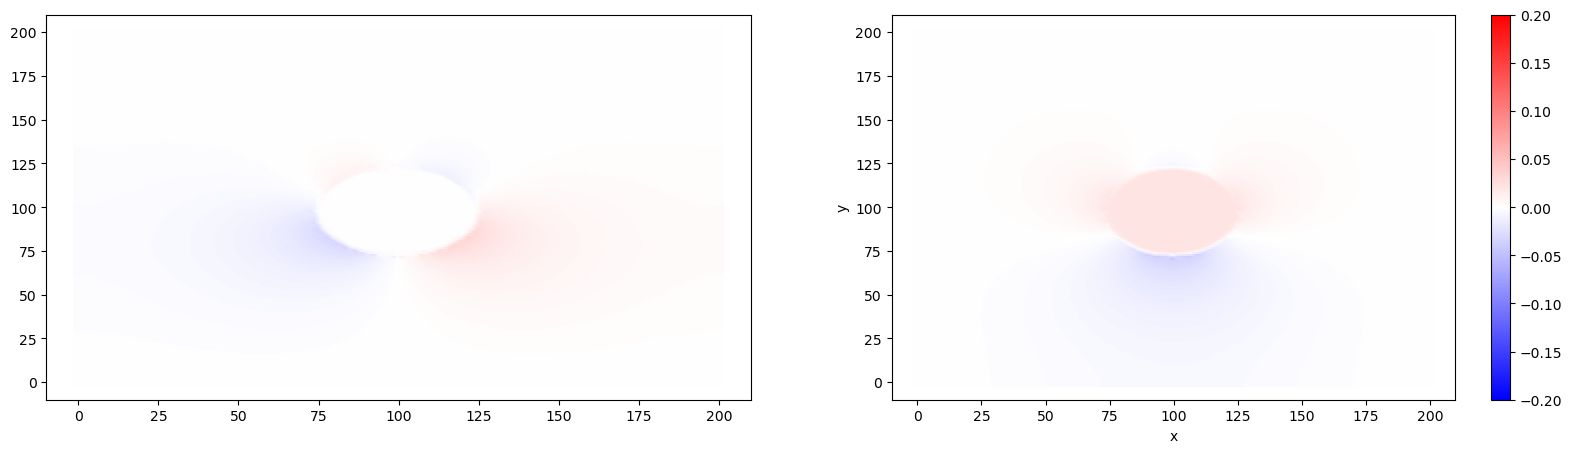

In [72]:
Ex, Ey = np.gradient(-V)
Emag = np.sqrt(Ex*Ex + Ey*Ey)


plt.figure(figsize=(20, 5))

#-- Ex field
ax = plt.subplot(121)
plt.scatter(X, Y, c=Ex.transpose(), vmin=-0.2, vmax=0.2, cmap=plt.cm.bwr)

#-- Ey field
ax = plt.subplot(122)
plt.scatter(X, Y, c=Ey.transpose(), vmin=-0.2, vmax=0.2, cmap=plt.cm.bwr)

plt.colorbar()

ax.set_xlabel('x'), ax.set_ylabel ('y')
plt.show()